**Architecture de travail**

**1. Pré-traitemment des données :**

  - Analyse exploratoire des données pour comprendre la distrubition des classes et des caractéristiques.
  - Feature extraction.
  - Encodage des variables categorielles.
  - Normalisation des données à un échelle valable à l'entrainement si necessaire.
  - Faire un premier modèle de test (Regression).

**2. Choix des modèles :**
  - Choisir les modèles les plus adaptés au detection des fraudes, tels que les réseaux de neurones, les méthodes ensemblistes (Random Forest, Gradient Boosting), un modèles linéaires et un DNN.
  - Entraînement des modèles sur l'ensemble d'entraînement avec différentes architectures et hyperparamètres.

**3. Entrainement des modèles:**
  - Diviser les données en train_set et Test_set.
  - Entrainer les modèles en différent paramètres et caractéristiques (Pipline use).

**4. Evaluation des modèles :**
  - Faire de l'evaluation sur les différentes métrique (Recall,Accuracy,F1-score,...)
  - Comprendre les scores de chaque métrique et choisir celle qui reflète mieux la réalité et la bonne décision afin d'obtenir un modèle sensiblement parfait.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, classification_report,matthews_corrcoef
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
data=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Data Mining project/new_train.xlsx')
data

,bidder_id,payment_account,address,outcome,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,24,18,5.711121e+11,home goods,ke,0.583333
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0,3,1,3.233579e+12,office equipment,id,0.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0,4,4,2.379000e+12,sporting goods,id,0.500000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0,1,1,0.000000e+00,books and music,my,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0,155,23,7.777888e+10,office equipment,in,0.341935
...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0,36,25,2.099162e+12,mobile,uk,0.111111
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0,1,1,0.000000e+00,mobile,ua,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0,2,1,9.798474e+12,mobile,id,1.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0,1,1,0.000000e+00,office equipment,sa,1.000000


In [ ]:
data.shape

(2013, 10)

# Pré-traitement des données:

In [ ]:
data.dtypes

bidder_id                     object
payment_account               object
address                       object
outcome                        int64
total_bids                     int64
unique_auctions                int64
avg_time_between_bids        float64
most_frequent_merchandise     object
most_frequent_country         object
unique_device_ratio          float64
dtype: object

In [ ]:
#Q1 = data['total_bids'].quantile(0.25)
#Q3 = data['total_bids'].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Filtrage des valeurs aberrantes
#data = data[(data['total_bids'] >= lower_bound) & (data['total_bids'] <= upper_bound)]


In [ ]:
data['most_frequent_merchandise'].unique()

array(['home goods', 'office equipment', 'sporting goods',
       'books and music', 'mobile', 'jewelry', 'computers', 'clothing', 0,
       'furniture', 'auto parts'], dtype=object)

In [ ]:
data['most_frequent_country'].unique()

array(['ke', 'id', 'my', 'in', 'cn', 'de', 'br', 'us', 'za', 'se', 'sa',
       'ph', 'vn', 'iq', 'mx', 'tr', 0, 'au', 'ru', 'uk', 'ar', 'ro',
       'th', 'ng', 'bn', 'pl', 'py', 'ir', 'dk', 'om', 'es', 'ca', 'bd',
       'lt', 'il', 'sg', 'ae', 'ua', 'nl', 'pk', 'et', 'gh', 'ma', 'fr',
       'no', 'bf', 'cm', 'lk', 'kr', 'gt', 'tz', 'np', 'ch', 'hk', 'mz',
       'jp', 'bh', 'az', 'zw', 'ba', 'rs', 'qa', 'eu', 'fi', 'it', 'eg',
       'zm', 'mt', 'jo', 'tn', 'ye', 'sd', 'cl', 'kw', 'dz', 'pa'],
      dtype=object)

## Encodage des variables catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle


#encoder = LabelEncoder()
# Initialiser les encodeurs
encoder_merchandise = LabelEncoder()
encoder_country = LabelEncoder()

data['most_frequent_merchandise'] = data['most_frequent_merchandise'].astype(str)
data['most_frequent_country'] = data['most_frequent_country'].astype(str)

data['most_frequent_merchandise'] = encoder_merchandise.fit_transform(data['most_frequent_merchandise'])
data['most_frequent_country'] = encoder_country.fit_transform(data['most_frequent_country'])

# Sauvegarder les encodeurs pour le deploiement
pickle.dump(encoder_merchandise, open('/content/drive/MyDrive/Colab Notebooks/Data Mining project/label_encoder_merchandise.pkl', 'wb'))
pickle.dump(encoder_country, open('/content/drive/MyDrive/Colab Notebooks/Data Mining project/label_encoder_country.pkl', 'wb'))

In [ ]:
data

,bidder_id,payment_account,address,outcome,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,24,18,5.711121e+11,6,36,0.583333
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0,3,1,3.233579e+12,9,28,0.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0,4,4,2.379000e+12,10,28,0.500000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0,1,1,0.000000e+00,2,44,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0,155,23,7.777888e+10,9,30,0.341935
...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0,36,25,2.099162e+12,8,69,0.111111
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0,1,1,0.000000e+00,8,68,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0,2,1,9.798474e+12,8,28,1.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0,1,1,0.000000e+00,9,60,1.000000


# Déséquilibre de classes

In [ ]:
data['outcome'].value_counts()

outcome
0    1910
1     103
Name: count, dtype: int64

In [ ]:
X= data.drop(['bidder_id','payment_account','address','outcome'],axis=1)
y= data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

#positive_cases = data[data['outcome'] == 1.0]
#negative_cases = data[data['outcome'] == 0.0]

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

data = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name='outcome')], axis=1)

data.shape

(3058, 7)

In [ ]:
data["outcome"].value_counts()

outcome
0    1529
1    1529
Name: count, dtype: int64

Apprement que les classes sont désequilibrés 1910 pour la classe 0 et seulement 103 pour la classe 1.

#Corrélations

<Axes: >

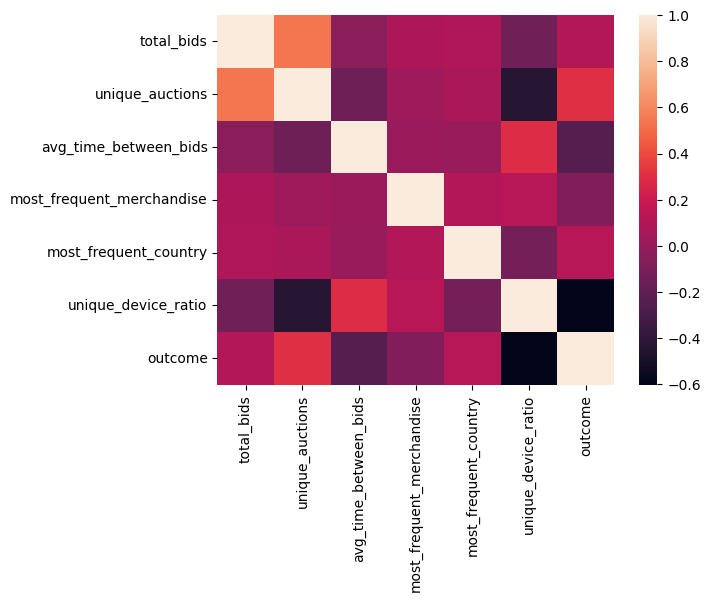

In [ ]:
sns.heatmap(data.corr())

<Axes: >

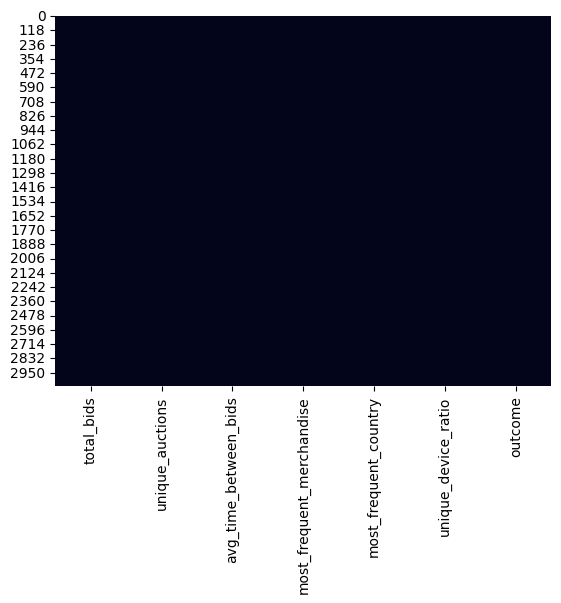

In [ ]:
sns.heatmap( data.isna() ,cbar=False)

In [ ]:
X = data.drop(['outcome'],axis=1)
y = data['outcome']

In [ ]:
X

,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,718,265,1.077123e+11,8,30,0.289694
1,7,7,9.821263e+12,8,30,1.000000
2,71,41,1.036169e+12,10,64,0.464789
3,19,12,3.971073e+12,10,28,0.631579
4,74,31,1.712141e+11,10,54,0.635135
...,...,...,...,...,...,...
3053,398,86,6.683158e+10,7,44,0.317172
3054,5550,257,2.459218e+09,6,57,0.055974
3055,440,43,2.154652e+10,9,69,0.025662
3056,283,14,4.563684e+10,7,58,0.152016


# Standardisation

In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Sauvegarder l'objet de transformation pour le deploiement
pickle.dump(scaler, open('/content/drive/MyDrive/Colab Notebooks/Data Mining project/scaler.pkl', 'wb'))


In [ ]:
X = pd.DataFrame(X, columns=data.drop(['outcome'],axis=1).columns)

In [ ]:
X['total_bids'].min()

-0.19534723901726703

In [ ]:
X

,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
0,-0.152403,0.932562,-0.232906,0.281540,-0.542146,-0.246695
1,-0.194929,-0.605114,1.409821,0.281540,-0.542146,1.796541
2,-0.191101,-0.402474,-0.075888,1.340520,1.301089,0.256976
3,-0.194211,-0.575314,0.420454,1.340520,-0.650571,0.736758
4,-0.190921,-0.462074,-0.222166,1.340520,0.758961,0.746987
...,...,...,...,...,...,...
3053,-0.171543,-0.134275,-0.239819,-0.247949,0.216833,-0.167651
3054,0.136600,0.884882,-0.250706,-0.777439,0.921600,-0.919002
3055,-0.169031,-0.390554,-0.247478,0.811030,1.572153,-1.006196
3056,-0.178421,-0.563394,-0.243404,-0.247949,0.975812,-0.642733


# Partitionnement des donnés train/test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Evaluation

In [ ]:
from sklearn.metrics import matthews_corrcoef, make_scorer
def evaluation (model,X_train,X_test,y_train,y_test):

  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(confusion_matrix(y_test,y_pred))

  print(classification_report(y_test,y_pred))
  print('MCC : ', matthews_corrcoef(y_test, y_pred))
  #mcc_scorer = make_scorer(matthews_corrcoef)

  N,train_score,val_score = learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1.0,10))

  plt.figure(figsize=(12, 8))

  plt.plot(N,train_score.mean(axis=1),label ='train score')

  plt.plot(N,val_score.mean(axis=1),label ='validation score')

  plt.legend()


In [ ]:
preprocessor = make_pipeline(PolynomialFeatures(3,include_bias=False),SelectKBest(f_classif,k=14))

# Regression logistique

In [ ]:
LogisticRegression = make_pipeline(preprocessor, LogisticRegression( C=0.1, max_iter=1000, solver='lbfgs', random_state=0))

[[266  59]
 [ 39 248]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       325
           1       0.81      0.86      0.84       287

    accuracy                           0.84       612
   macro avg       0.84      0.84      0.84       612
weighted avg       0.84      0.84      0.84       612

MCC :  0.6812596232772197


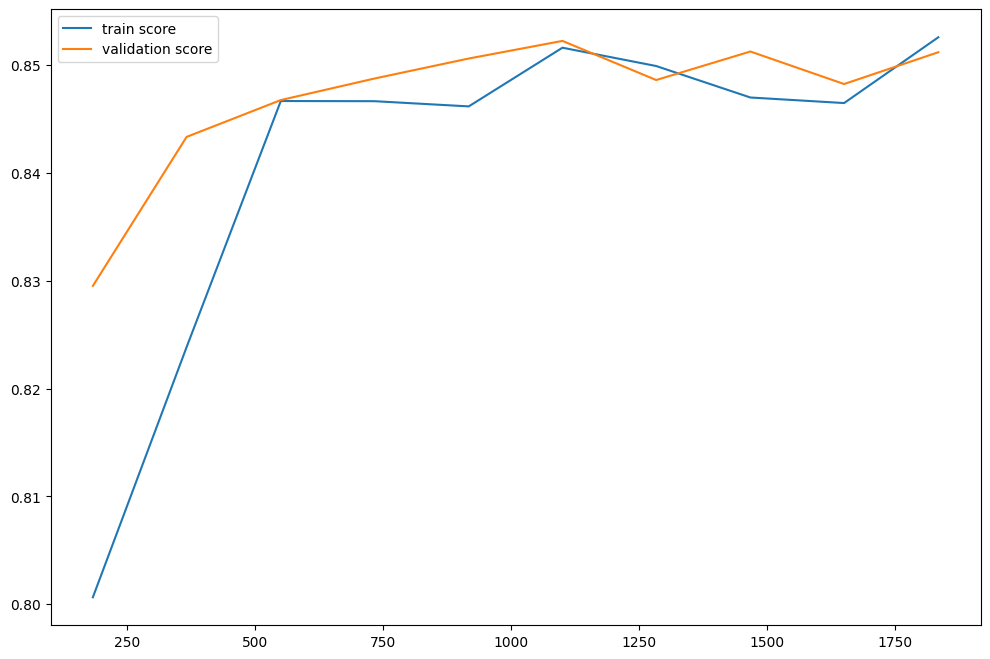

In [ ]:
evaluation(LogisticRegression,X_train,X_test,y_train,y_test)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_2= PCA(n_components=2)

X_pca = pca_2.fit_transform(X)
df_pca = pd.DataFrame(data= X_pca,columns=["P1","P2"])

df_pca["y"]=data["outcome"]

In [ ]:
df_pca

,P1,P2,y
0,0.607561,-0.156967,0
1,-1.886856,1.138304,0
2,-0.205823,1.246002,0
3,-1.039816,0.956658,0
4,-0.539121,1.170107,0
...,...,...,...
3053,0.021816,-0.329158,1
3054,1.299637,-0.485969,1
3055,0.538968,0.471971,1
3056,0.123736,-0.293579,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
pca.fit(X_train)
pca.fit(X_test)

PCA(n_components=0.95)

In [ ]:
pca.n_components_

5

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

[[262  63]
 [ 43 244]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       325
           1       0.79      0.85      0.82       287

    accuracy                           0.83       612
   macro avg       0.83      0.83      0.83       612
weighted avg       0.83      0.83      0.83       612

MCC :  0.6550651495658365


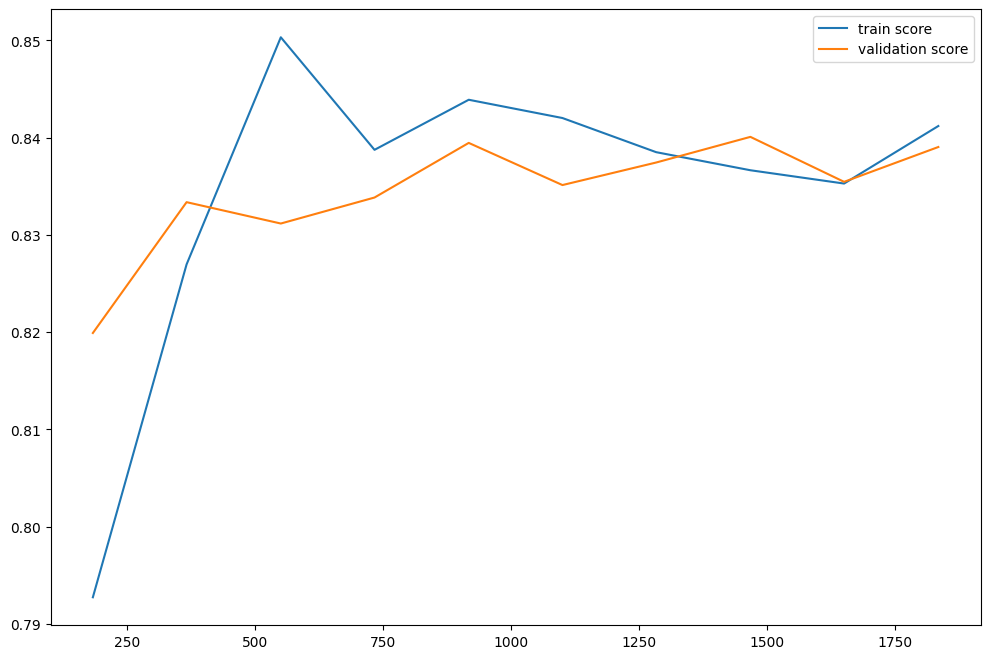

In [ ]:
evaluation(LogisticRegression, X_train_pca, X_test_pca,y_train,y_test)

# Optimisation de la regression logistique

In [ ]:
hyper_param_reg ={'pipeline__polynomialfeatures__degree':[1,2,3,4],
              'pipeline__selectkbest__k':range(1,20),
              'logisticregression__C':[0.01,0.1,1]}

from sklearn.model_selection import GridSearchCV

grid_reg = GridSearchCV(LogisticRegression,param_grid=hyper_param_reg,cv=5)

grid_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
195 fits failed out of a total of 1140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1, max_iter=1000,
                                                           random_state=0))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1],
                         'pipeline__polynomialfeatures__degree': [1, 2, 3, 4],
                         'pipeline__selectkbest__k': range(1, 20)})

{'logisticregression__C': 1, 'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 19}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=19))])),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=1000, random_state=0))])
[[271  54]
 [ 37 250]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       325
           1       0.82      0.87      0.85       287

    accuracy                           0.85       612
   macro avg       0.85      0.85      0.85       612
weighted avg       0.85      0.85      0.85       612

MCC :  0.7035811386453218


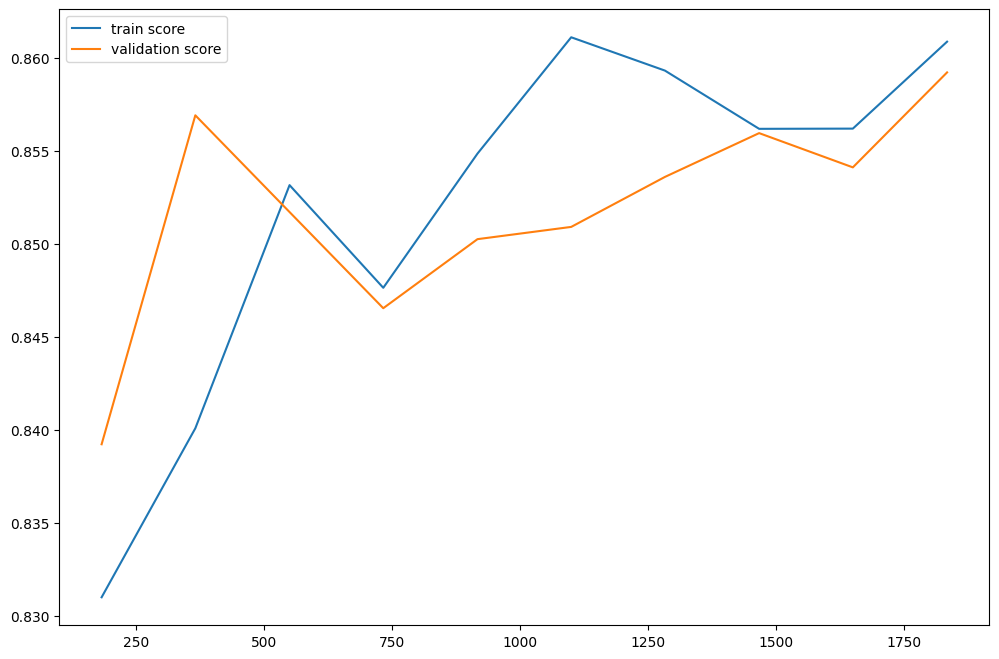

In [ ]:
print(grid_reg.best_params_)
print(grid_reg.best_estimator_)
evaluation(grid_reg.best_estimator_,X_train,X_test,y_train,y_test)

# Testons sur d'autres modèle RandomForest, SVM, KNN...

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,SVC(random_state=0))
KNN = make_pipeline(preprocessor,KNeighborsClassifier())

In [ ]:
dict_modeles ={
    'RandomForest':RandomForest,
    'AdaBoost':AdaBoost,
    'SVM':SVM,
    'KNN':KNN
}

RandomForest
[[297  28]
 [ 18 269]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       325
           1       0.91      0.94      0.92       287

    accuracy                           0.92       612
   macro avg       0.92      0.93      0.92       612
weighted avg       0.93      0.92      0.92       612

MCC :  0.849853761780046
AdaBoost
[[298  27]
 [ 34 253]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       325
           1       0.90      0.88      0.89       287

    accuracy                           0.90       612
   macro avg       0.90      0.90      0.90       612
weighted avg       0.90      0.90      0.90       612

MCC :  0.7998078399162158
SVM
[[260  65]
 [ 27 260]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       325
           1       0.80      0.91      0.85       287

    accuracy                        

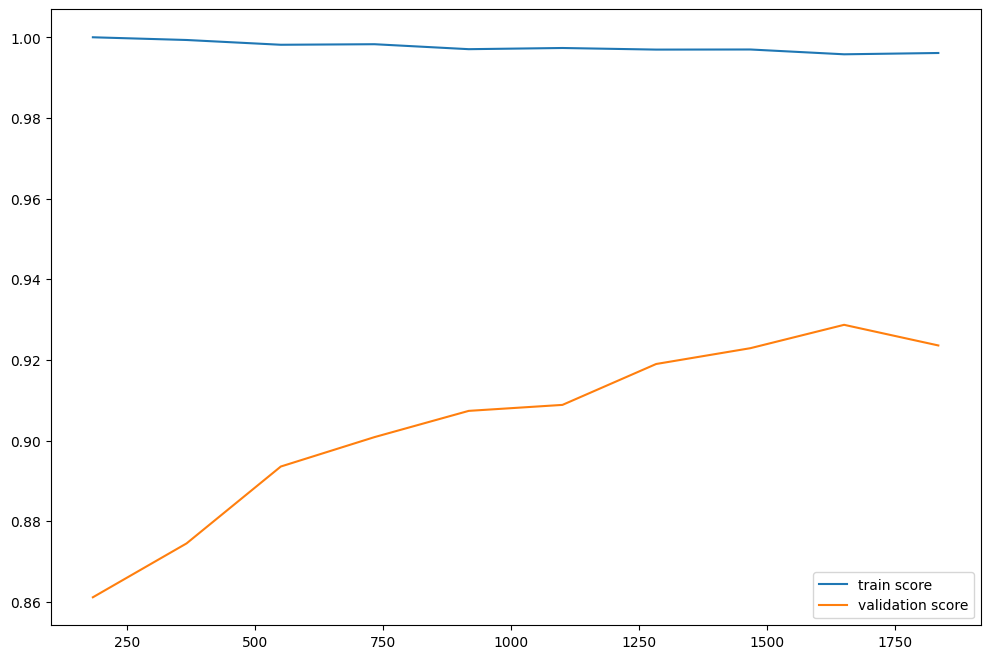

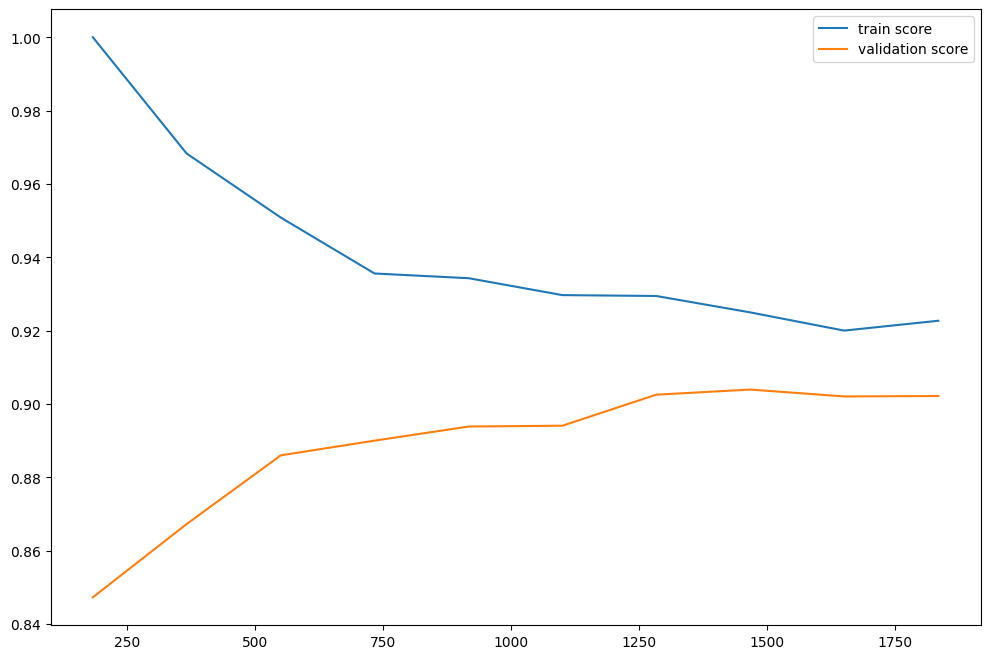

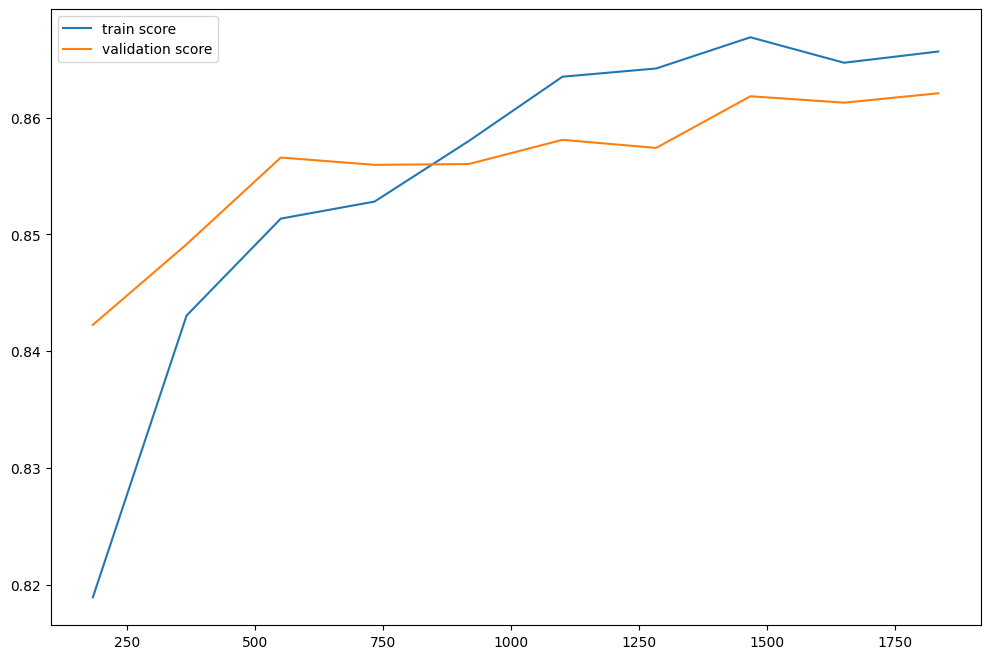

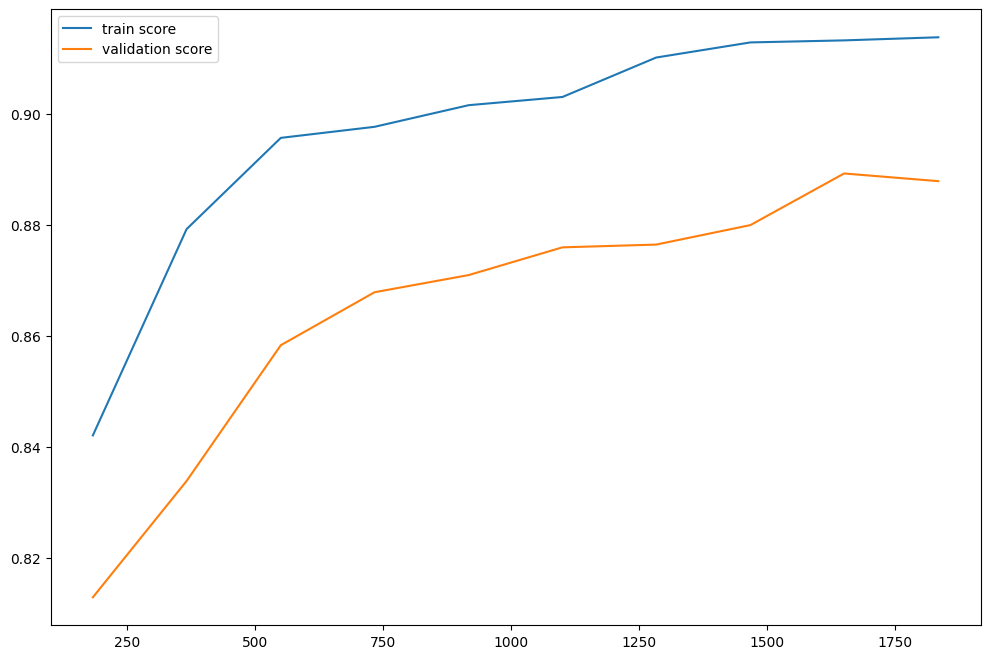

In [ ]:
for nom,modele in dict_modeles.items():
  print(nom)
  evaluation(modele,X_train,X_test,y_train,y_test)

# Optimisation de RandomForest

In [ ]:
hyper_params_RF = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(1, 7)}

from sklearn.model_selection import GridSearchCV

grid_RF = GridSearchCV(RandomForest, param_grid=hyper_params_RF, cv=5)

grid_RF.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(1, 7)})

{'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 6}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=1,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=6))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])
[[300  25]
 [ 12 275]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       325
           1       0.92      0.96      0.94       287

    accuracy                           0.94       612
   macro avg       0.94      0.94      0.94       612
weighted avg       0.94      0.94      0.94       612

MCC :  0.879733771882819


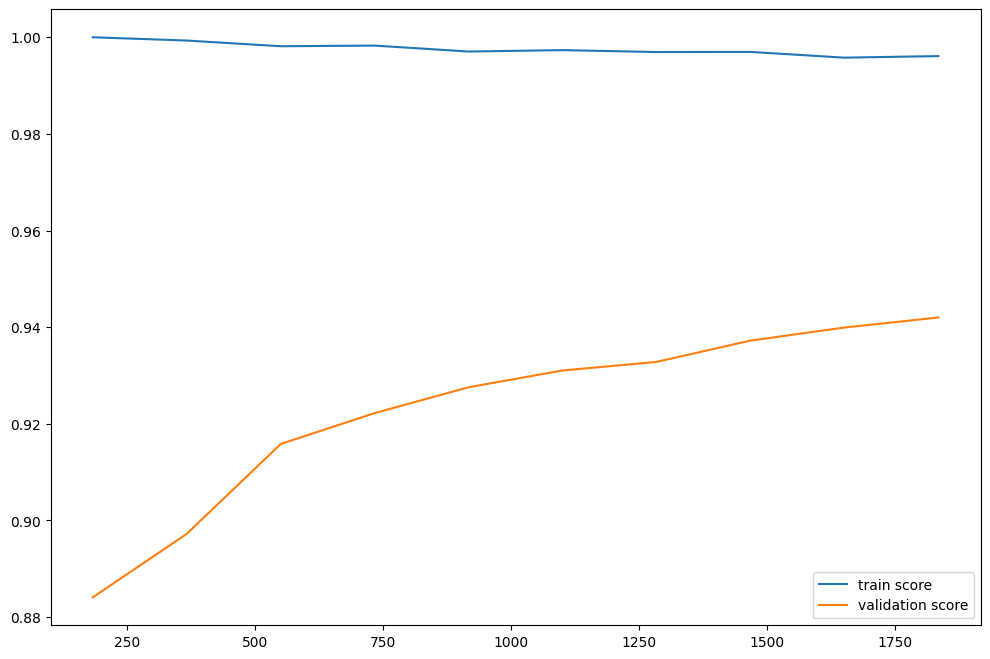

In [ ]:
print(grid_RF.best_params_)
print(grid_RF.best_estimator_)
evaluation(grid_RF.best_estimator_,X_train,X_test,y_train,y_test)

In [ ]:
hyper_params_RF1 = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(6, 40)}

from sklearn.model_selection import RandomizedSearchCV

grid_RF1 = RandomizedSearchCV(RandomForest,hyper_params_RF1, scoring='f1', cv=5)

grid_RF1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pack

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(degree=3,
                                                                                  include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest(k=14))])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   param_distributions={'pipeline__polynomialfeatures__degree': [0,
                                                                                 1,
                                                                                 2,
                                                                                 3],
                                        'pipeline__selectkbest__k': range(6, 40)},
                   scoring='f1')

{'pipeline__selectkbest__k': 23, 'pipeline__polynomialfeatures__degree': 2}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=23))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])
[[299  26]
 [  9 278]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       325
           1       0.91      0.97      0.94       287

    accuracy                           0.94       612
   macro avg       0.94      0.94      0.94       612
weighted avg       0.94      0.94      0.94       612

MCC :  0.8869453920798368


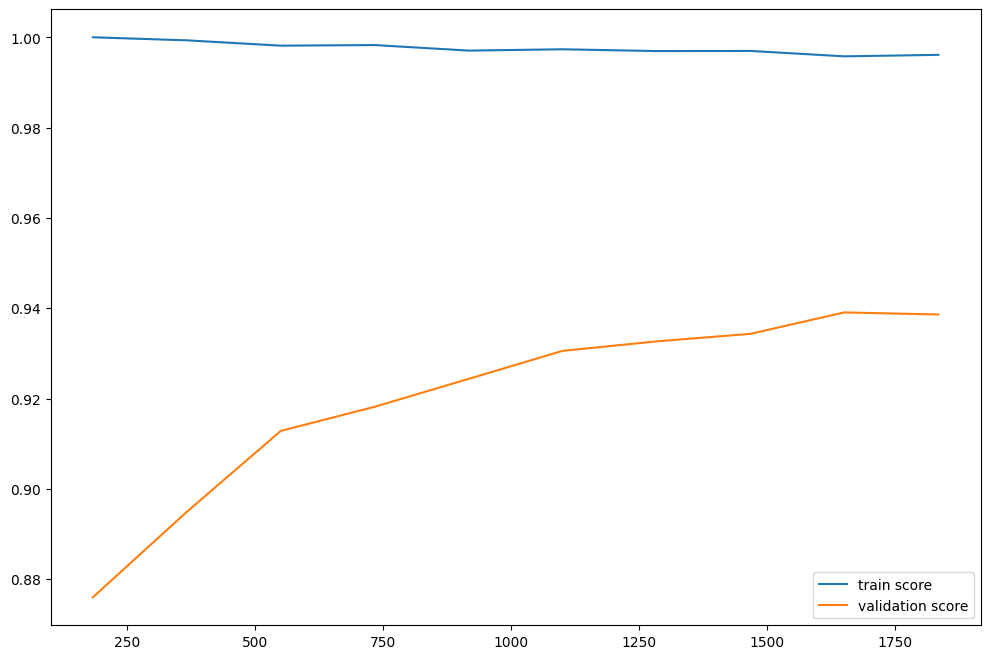

In [ ]:
print(grid_RF1.best_params_)
print(grid_RF1.best_estimator_)
evaluation(grid_RF1.best_estimator_,X_train,X_test,y_train,y_test)

# Optimisation de AdaBoost

In [ ]:
hyper_params_Ada = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(1, 15)}

grid_Ada = GridSearchCV(AdaBoost, param_grid=hyper_params_Ada, cv=5)

grid_Ada.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(1, 15)})

{'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 12}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=12))])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])
[[298  27]
 [ 26 261]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       325
           1       0.91      0.91      0.91       287

    accuracy                           0.91       612
   macro avg       0.91      0.91      0.91       612
weighted avg       0.91      0.91      0.91       612

MCC :  0.8261668981805702


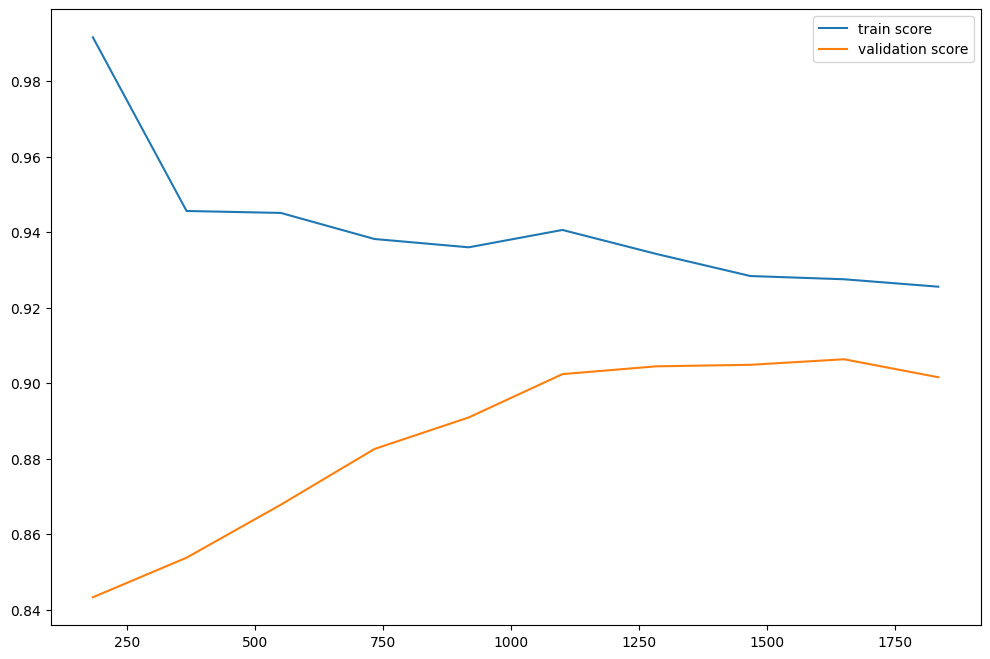

In [ ]:
print(grid_Ada.best_params_)
print(grid_Ada.best_estimator_)
evaluation(grid_Ada.best_estimator_,X_train,X_test,y_train,y_test)

# Optimisation AdaBoost avec RandomizedSearchCV dans une boucle de 10 exécutions = 10 modèles

In [ ]:
hyper_params_Ada1 = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3,4],
               'pipeline__selectkbest__k': range(12, 50)}

models=[]

for i in range(10):
  grid_Adai = RandomizedSearchCV(AdaBoost, hyper_params_Ada1, scoring='f1', cv=5)
  grid_Adai.fit(X_train, y_train)
  models.append(grid_Adai)




#grid_Ada1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pack

[[293  32]
 [ 20 267]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       325
           1       0.89      0.93      0.91       287

    accuracy                           0.92       612
   macro avg       0.91      0.92      0.91       612
weighted avg       0.92      0.92      0.92       612

MCC :  0.8304642801180852
[[294  31]
 [ 21 266]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       325
           1       0.90      0.93      0.91       287

    accuracy                           0.92       612
   macro avg       0.91      0.92      0.91       612
weighted avg       0.92      0.92      0.92       612

MCC :  0.830199508588443
[[290  35]
 [ 23 264]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       325
           1       0.88      0.92      0.90       287

    accuracy                           0.91       612
   macro

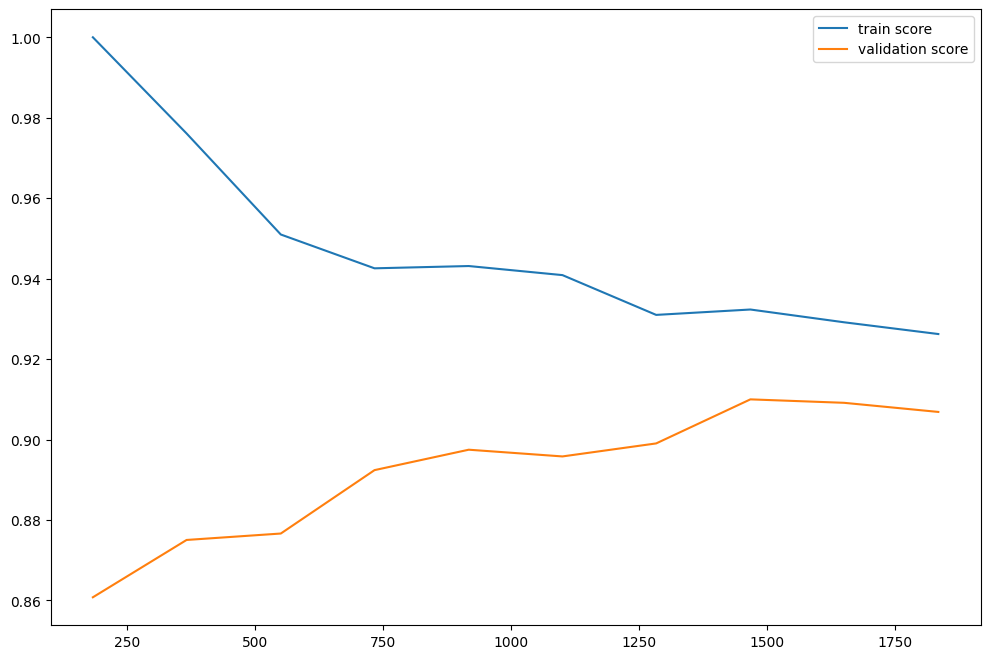

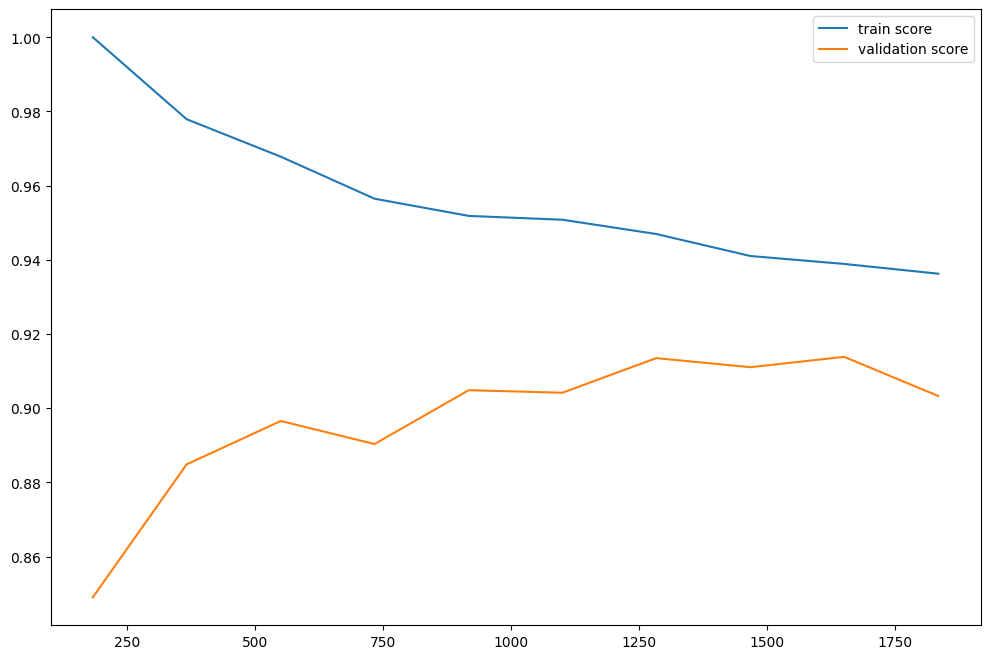

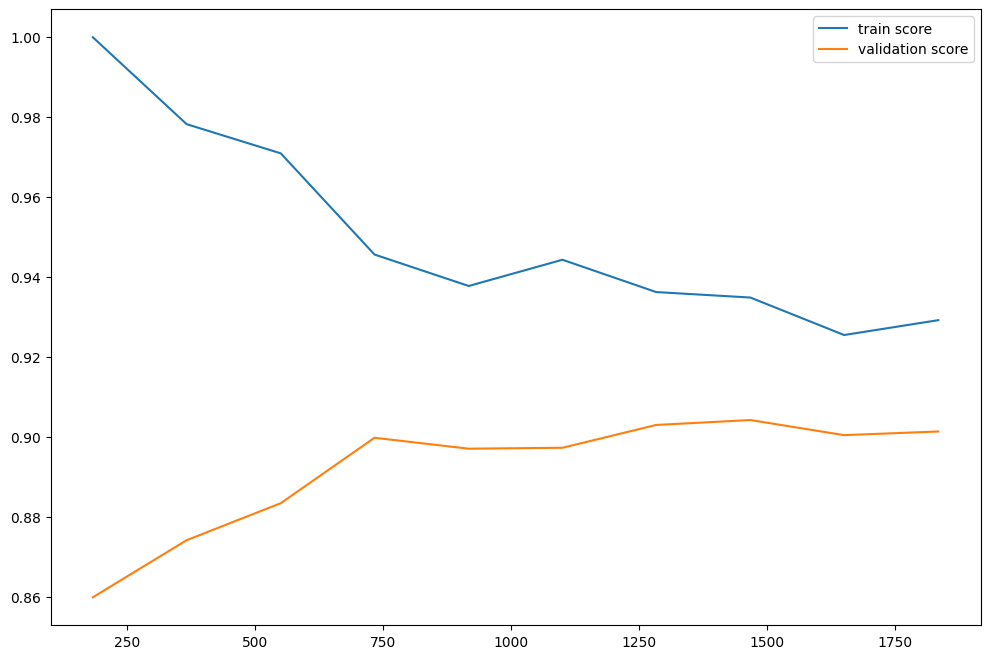

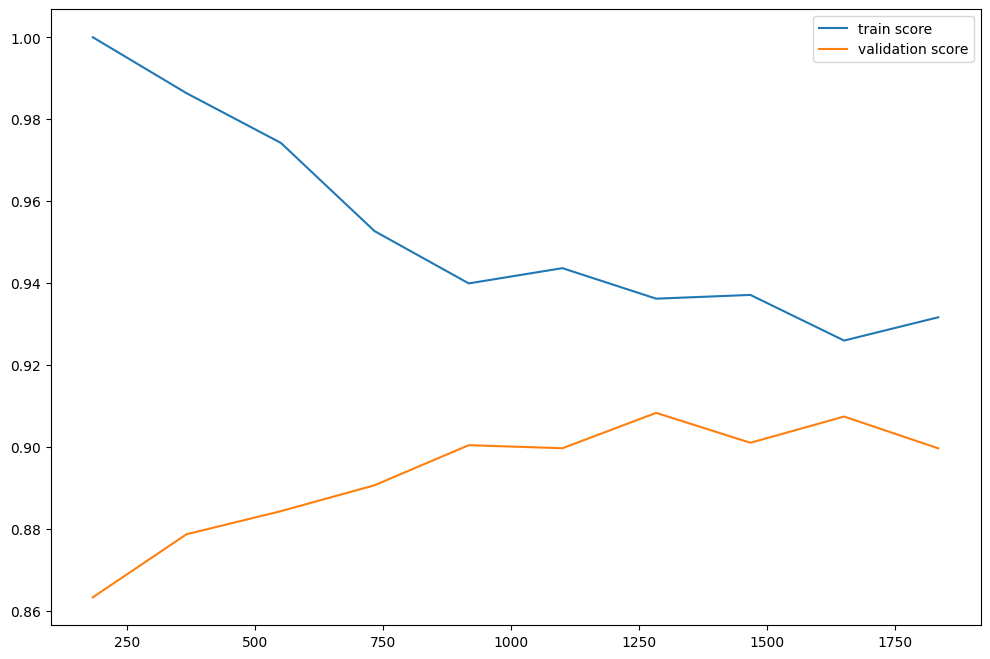

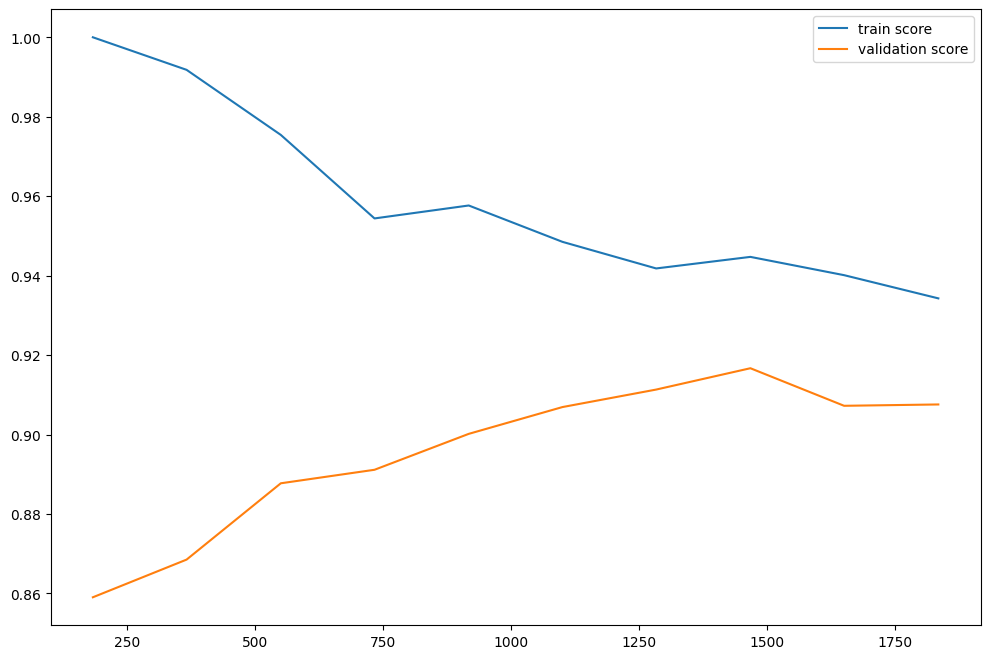

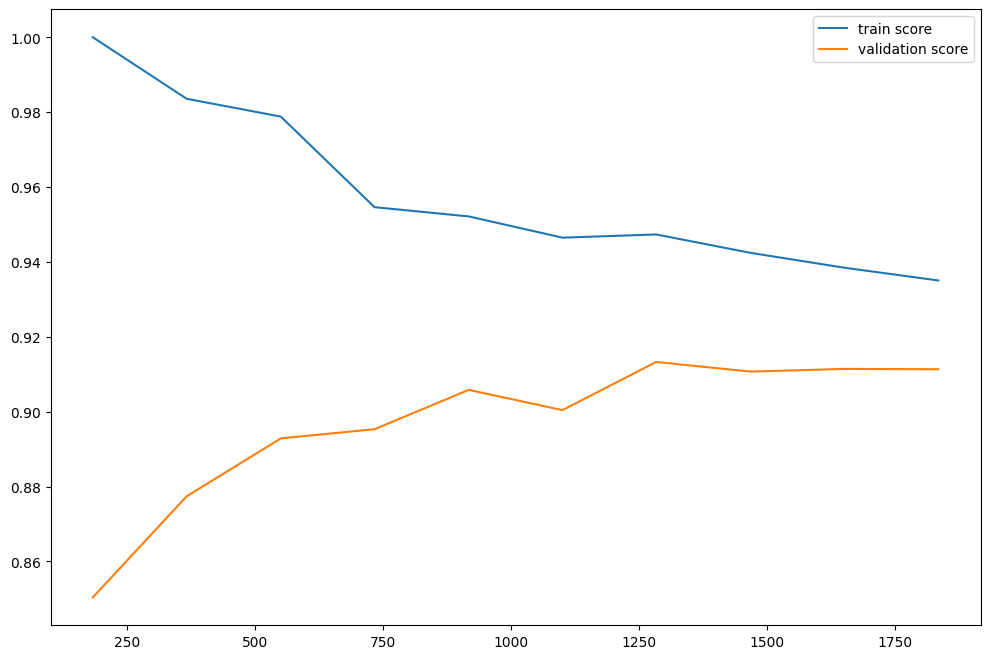

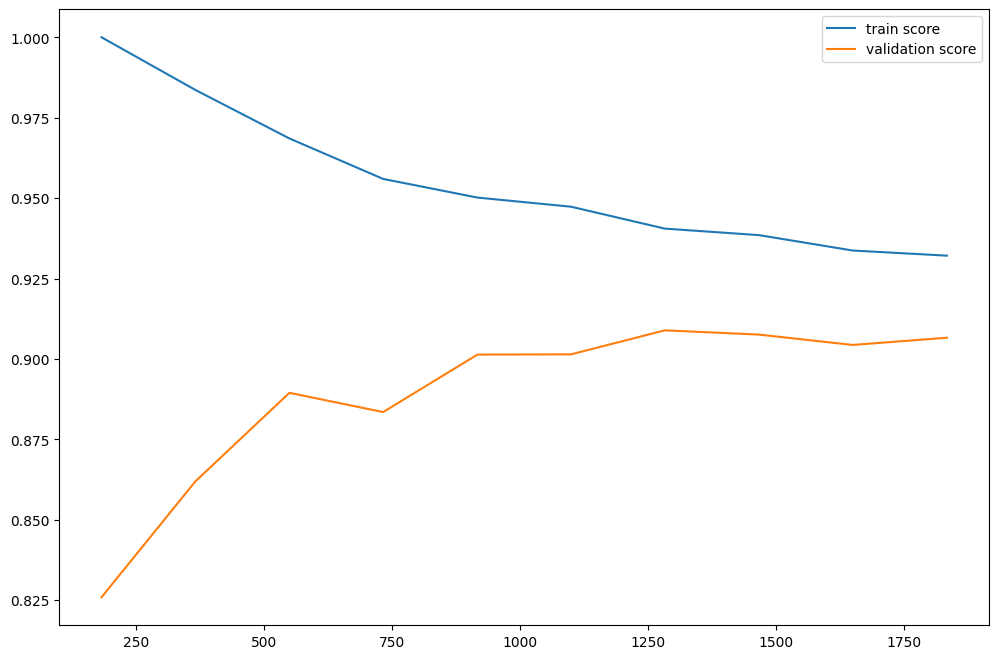

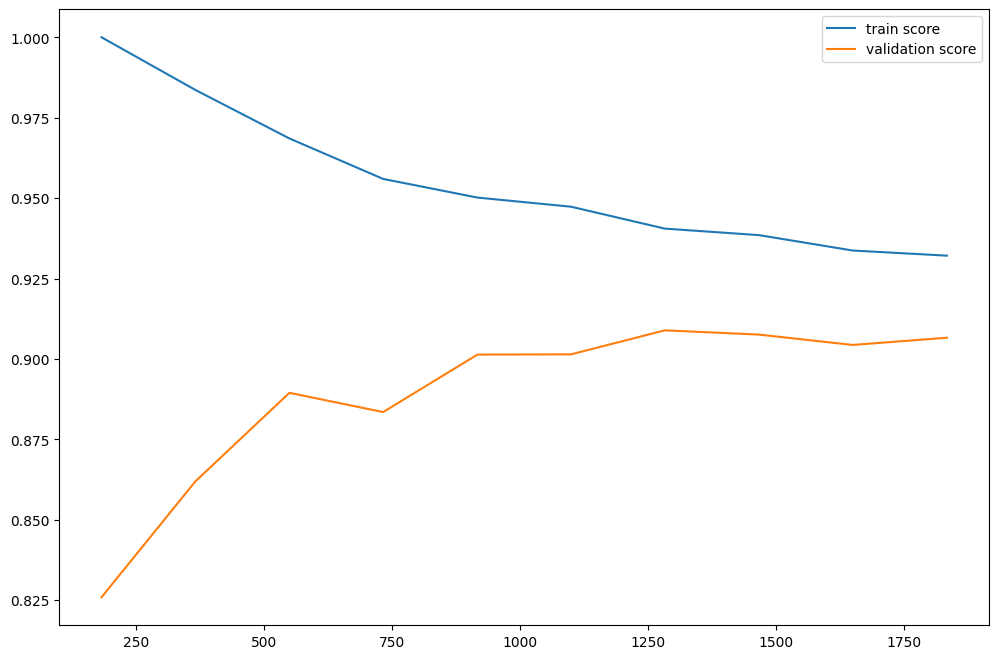

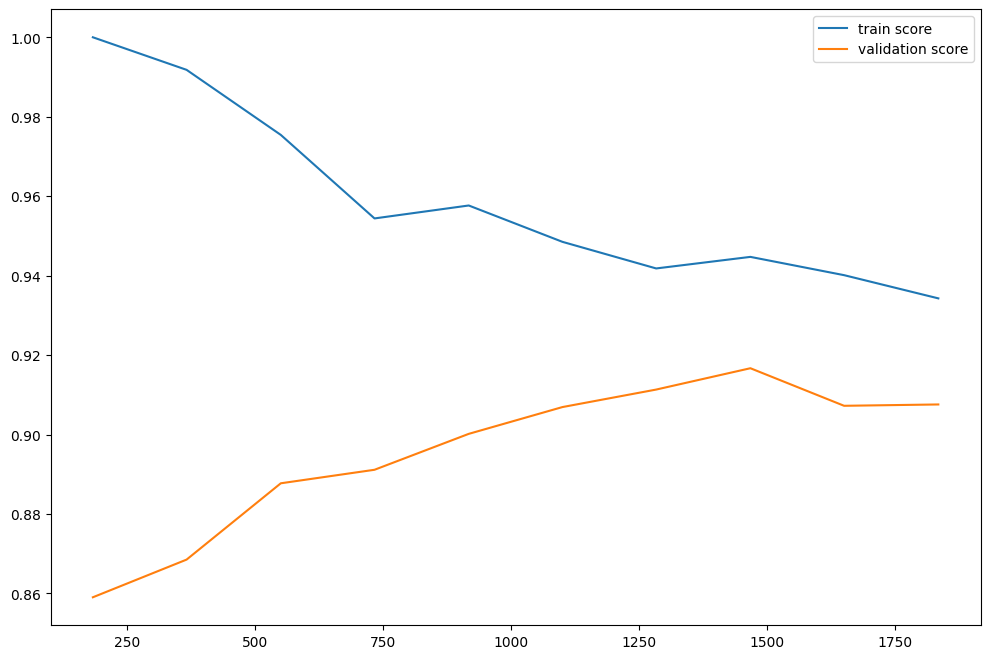

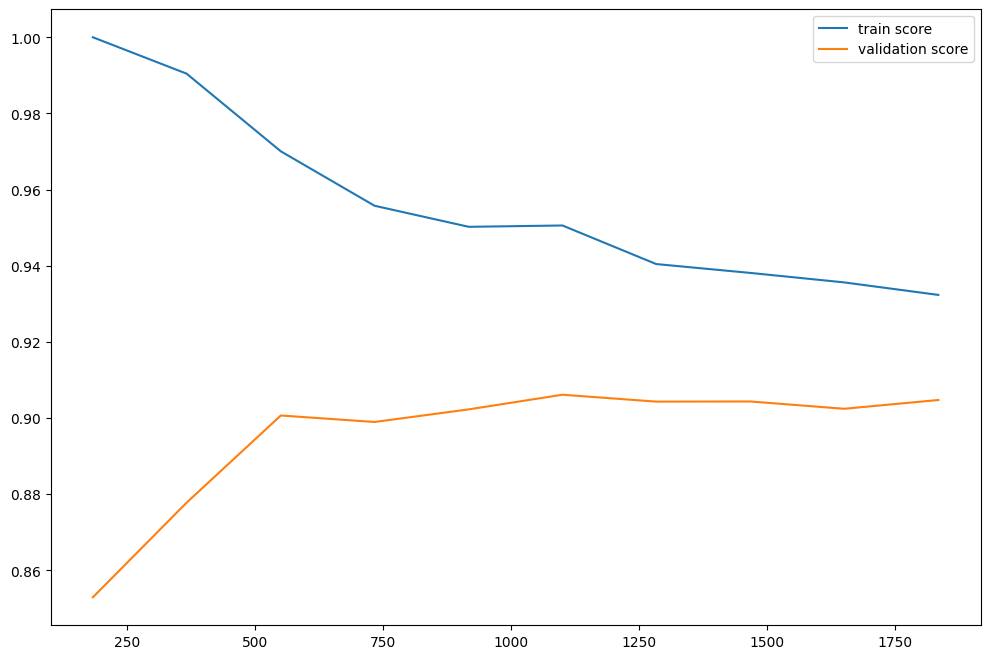

In [ ]:
for i in models:
  evaluation(i.best_estimator_,X_train, X_test, y_train, y_test)

In [ ]:
X_train

,total_bids,unique_auctions,avg_time_between_bids,most_frequent_merchandise,most_frequent_country,unique_device_ratio
1424,-0.185598,0.008765,-0.170491,0.281540,-0.542146,0.490620
141,-0.195108,-0.622994,3.519742,1.340520,-0.650571,1.796541
1550,-0.195168,-0.640874,0.107491,0.281540,-0.813209,0.837689
2312,-0.072377,0.217364,-0.244761,-1.836419,0.596323,-1.071738
2411,-0.181352,-0.187915,-0.240121,-0.247949,0.216833,-0.081383
...,...,...,...,...,...,...
763,-0.193852,-0.617034,-0.156769,0.281540,-0.542146,0.415795
835,-0.001741,2.124559,-0.247082,0.281540,-0.542146,-0.656129
1653,0.311006,1.319961,-0.250279,1.340520,1.355302,-1.019722
2607,0.140966,0.729923,-0.249180,-0.247949,-0.216869,-0.928057


In [ ]:
models[3].best_params_

{'pipeline__selectkbest__k': 27, 'pipeline__polynomialfeatures__degree': 4}

[[294  31]
 [ 30 257]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       325
           1       0.89      0.90      0.89       287

    accuracy                           0.90       612
   macro avg       0.90      0.90      0.90       612
weighted avg       0.90      0.90      0.90       612

MCC :  0.7999271274770303


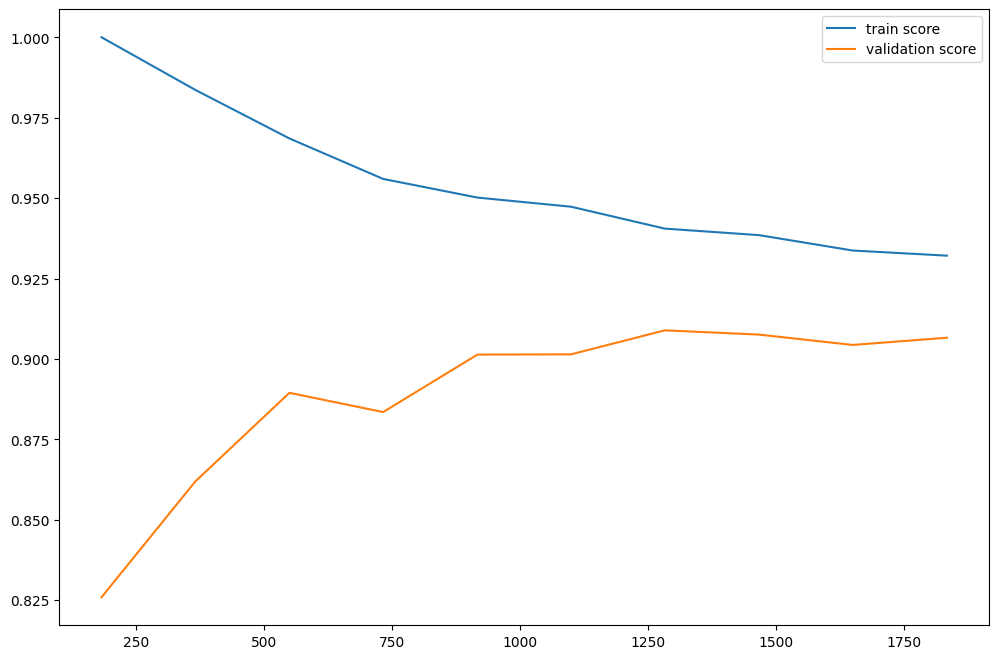

In [ ]:
evaluation(models[3].best_estimator_,X_train,X_test,y_train,y_test)

# Optimisation de SVM

In [ ]:
hyper_params_SVM = {'svc__gamma':[1e-3, 0.0005],
                'svc__C':[1, 10, 100, 1000],
                'pipeline__polynomialfeatures__degree':[ 1, 2, 3, 4],
               'pipeline__selectkbest__k': range(1, 20)}

grid_SVM = GridSearchCV(SVM, param_grid=hyper_params_SVM, cv=5)

grid_SVM.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
520 fits failed out of a total of 3040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [1, 2, 3, 4],
                         'pipeline__selectkbest__k': range(1, 20),
                         'svc__C': [1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.0005]})

{'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 19, 'svc__C': 1000, 'svc__gamma': 0.001}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=19))])),
                ('svc', SVC(C=1000, gamma=0.001, random_state=0))])
[[273  52]
 [ 28 259]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       325
           1       0.83      0.90      0.87       287

    accuracy                           0.87       612
   macro avg       0.87      0.87      0.87       612
weighted avg       0.87      0.87      0.87       612

MCC :  0.7411054003372828


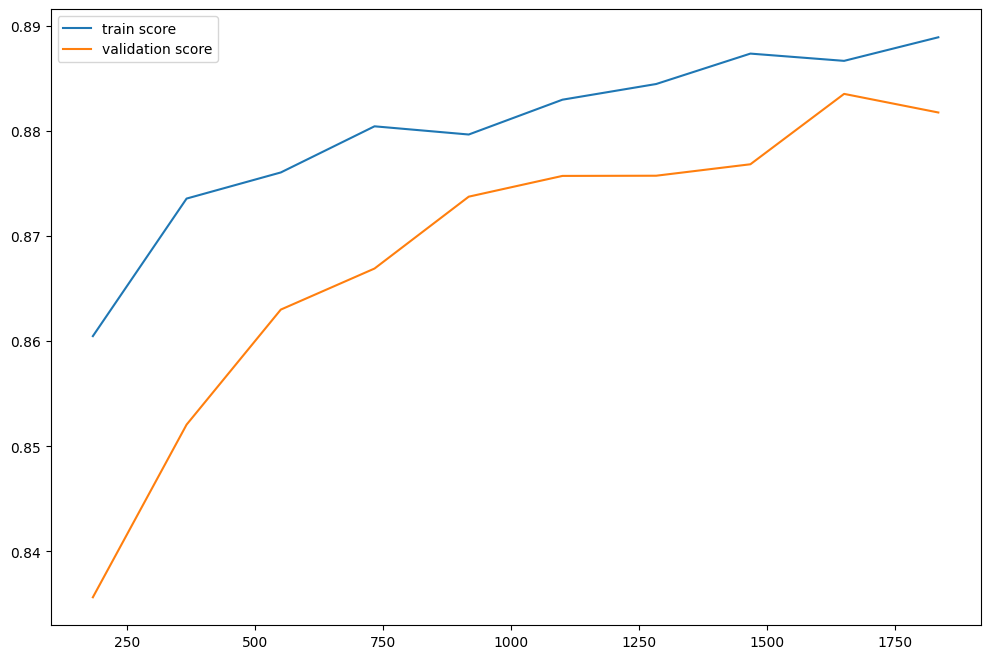

In [ ]:
print(grid_SVM.best_params_)
print(grid_SVM.best_estimator_)
evaluation(grid_SVM.best_estimator_,X_train,X_test,y_train,y_test)

In [ ]:
hyper_params_KNN = {'pipeline__polynomialfeatures__degree':[1, 2, 3, 4],
               'pipeline__selectkbest__k': range(1, 20)}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_KNN = GridSearchCV(KNN, param_grid=hyper_params_KNN, cv=5)

grid_KNN.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 380.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-pac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'pipeline__polynomialfeatures__degree': [1, 2, 3, 4],
                         'pipeline__selectkbest__k': range(1, 20)})

{'pipeline__polynomialfeatures__degree': 2, 'pipeline__selectkbest__k': 16}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=16))])),
                ('kneighborsclassifier', KNeighborsClassifier())])
[[284  41]
 [ 14 273]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       325
           1       0.87      0.95      0.91       287

    accuracy                           0.91       612
   macro avg       0.91      0.91      0.91       612
weighted avg       0.91      0.91      0.91       612

MCC :  0.8237552352690092


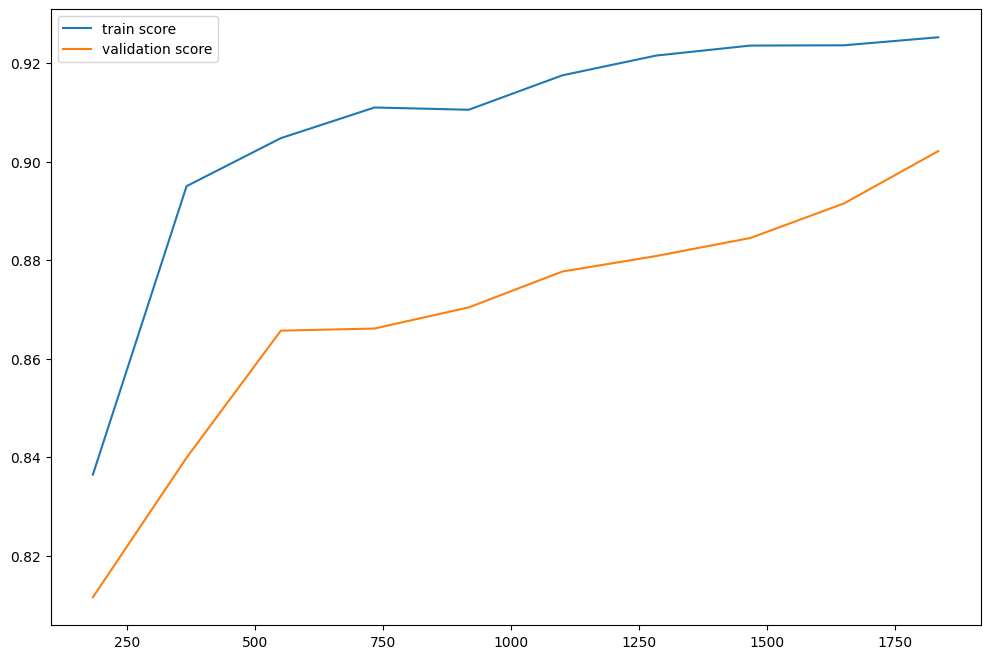

In [ ]:
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)
evaluation(grid_KNN.best_estimator_,X_train,X_test,y_train,y_test)

# Réseaux de neuronnes

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_layer1 = 64
num_layer2 = 32
num_folds = 5

# Diviser les données en plis
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

all_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

# Boucle sur les plis
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Créer le modèle
    model = keras.Sequential([
        layers.InputLayer(input_shape=(6,), name='Input_layer'),
        layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
        layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
        layers.Dense(1, activation='sigmoid', name='Output_layer')
    ])

    # Compiler le modèle
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[])

    # Entraîner le modèle sur les données d'entraînement du pli
    history = model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Évaluer le modèle sur les données de validation
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_classes = (y_val_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_val_fold, y_val_pred_classes)
    precision = precision_score(y_val_fold, y_val_pred_classes)
    recall = recall_score(y_val_fold, y_val_pred_classes)
    f1 = f1_score(y_val_fold, y_val_pred_classes)

    all_metrics['accuracy'].append(accuracy)
    all_metrics['precision'].append(precision)
    all_metrics['recall'].append(recall)
    all_metrics['f1_score'].append(f1)

# Afficher les moyennes des métriques sur tous les plis
for metric, values in all_metrics.items():
    average_metric = np.mean(values)
    print(f"Average {metric}: {average_metric}")


Epoch 1/20
77/77 [==============================] - 2s 7ms/step - loss: 0.5201 - val_loss: 0.4118
Epoch 2/20
77/77 [==============================] - 0s 3ms/step - loss: 0.4251 - val_loss: 0.3751
Epoch 3/20
77/77 [==============================] - 0s 4ms/step - loss: 0.4001 - val_loss: 0.3575
Epoch 4/20
77/77 [==============================] - 0s 4ms/step - loss: 0.3826 - val_loss: 0.3406
Epoch 5/20
77/77 [==============================] - 0s 4ms/step - loss: 0.3699 - val_loss: 0.3312
Epoch 6/20
77/77 [==============================] - 0s 3ms/step - loss: 0.3590 - val_loss: 0.3360
Epoch 7/20
77/77 [==============================] - 0s 3ms/step - loss: 0.3525 - val_loss: 0.3117
Epoch 8/20
77/77 [==============================] - 0s 4ms/step - loss: 0.3432 - val_loss: 0.3035
Epoch 9/20
77/77 [==============================] - 0s 4ms/step - loss: 0.3359 - val_loss: 0.3003
Epoch 10/20
77/77 [==============================] - 0s 3ms/step - loss: 0.3282 - val_loss: 0.2860
Epoch 11/20
77/77 [

In [ ]:
#Enregistrer le modèle final
pickle.dump(grid_RF.best_estimator_, open('/content/drive/MyDrive/Colab Notebooks/Data Mining project/model.pkl', 'wb'))

In [ ]:
X_train['avg_time_between_bids'].max()

12.619179890572909